# IEEE Fraud Detection - Notebook de suivi

La détection des fraudes en ligne est l'une des problématiques les plus courantes et sensibles dans de nombreux secteurs, en particulier les banques. Au cours des dernières années, les tentatives de fraude ont connu une forte hausse, ce qui rend la lutte contre ce phénomène très importante. 

Cette compétition est un problème de classification binaire - c'est-à-dire que notre variable cible est un attribut binaire (l'utilisateur fait-il le clic frauduleux ou non?)

Et notre objectif est de classer les utilisateurs en "frauduleux" ou "non frauduleux" le mieux possible.

On cherche à prédire la probabilité qu'une transaction en ligne soit frauduleuse.

# Séance 1

Pendant cette première semaine, nous nous intéressons essentiellement à l'exploration des données.

Plus précisément, nous analysons les dataframes train_identity, train_transaction, test_identity et test_transaction.

On rassemble les données train et test via la variable TransactionID.

La taille du dataset est pour les données ***train***, de 590540 observations et 434 variables.

Et pour les données ***test*** : 506691 observations et  433 variables.

Ci-dessous, les 5 premières lignes de l'échantillon train obtenu.

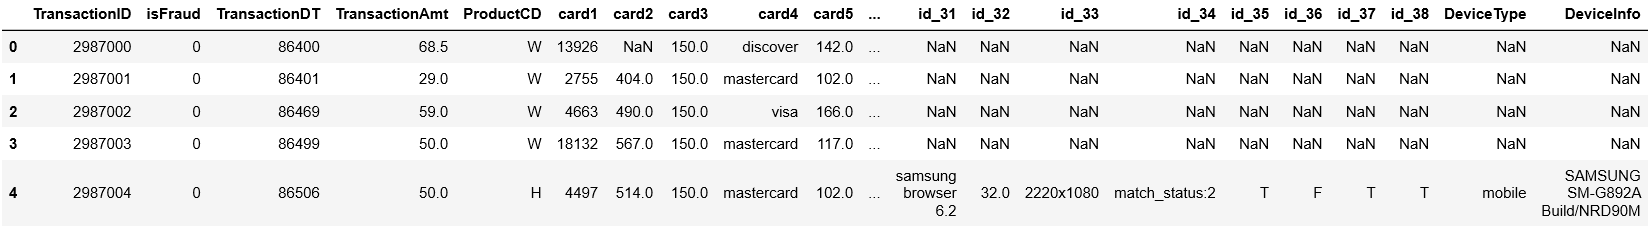

In [5]:
from IPython.display import Image
Image(filename='dataset.png',width=1000, height=600)

On remarque qu'il semble y avoir beaucoup de données manquantes.

On essaie ensuite de comprendre ce que chaque variable représente. En s'aidant du site Kaggle, on a réussi à comprendre certaines variables mais pas toutes.

En effet, 

Il y a des données qualitatives discrètes :

 - ***ProductCD*** : code produit pour chaque transaction
 - ***card1-card6*** : Informations sur la carte de paiement
 - ***P_emaildomain, R_emaildomain***, domaine de messagerie de l'acheteur et du destinataire 
 - ***addr1*** : région de facturation, ***addr2***: pays de facturation
 - ***M1-M9*** : Correspondance, comme les noms sur la carte et l'adresse, etc.
 - ***id_12, id_15, id_16, id_23, id_27, id_28, id_29, id_30, id_31, id_33, id_34, id_35, id_36, id_37, id_38***
 - ***DeviceType, DeviceInfo***  
 
Le reste des variables sont des variables numériques : 

 - ***TransactionDT***: timedelta à partir d'une datetime de référence donnée (pas un horodatage réel)
 
 - ***TransactionAMT***: c'est le montant de la transaction en USD

 - ***dist***: distance entre (sans limitation) l'adresse de facturation, l'adresse Nous avons quelques informations sur certaines variables :

 - ***TransactionDT***: timedelta à partir d'une datetime de référence donnée (pas un horodatage réel)
 
 - ***TransactionAMT***: c'est le montant de la transaction en USD

 - ***C1-C14***: comptage, comme le nombre d'adresses associées à la carte de paiement, etc. La signification réelle est masquée. 
 
 - ***D1-D15***: Timedelta, comme les jours entre la transaction précédente, etc. 
 
 - ***Vxxx***: Vesta a conçu de riches fonctionnalités, notamment le classement, le comptage et d'autres relations d'entité.
 
 - ***id01-id11***: Fonctionnalités numériques pour l'identité
 
 - ***IsFraud*** = 1 signifie transaction frauduleuse, sinon ***IsFraud*** = 0, la transaction est non-frauduleuse

Enfin nous réfléchissons à la manière de procéder afin de gérer les valeurs manquantes.

## Pour la séance prochaine

Le but sera de trouver une façon de gérer les valeurs manquantes et de continuer la visualisation des données de manière plus précise.

# Séance 2



 - **Valeurs manquantes** :
 
 Comme mentionné précédemment, les données contiennent beaucoup de valeurs manquantes. 

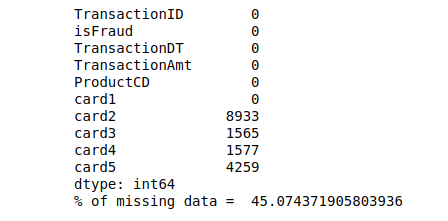

In [16]:
Image(filename='nan1.png',width=350, height=600)

On peut voir que $45\%$ des données du train sont des valeurs manquantes

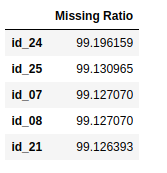

In [22]:
Image(filename='nan2.png',width=180, height=300)

De plus, ce tableau nous indique que par exemple, la variable $id\_24$ contient $99.20\%$ de valeurs manquantes, ce qui est énorme! 

Nous décidons alors de supprimer les 74 variables contenant plus de 80% de valeurs manquantes. En effet, nous avons hésité entre supprimer les variables contenant plus de 90%, plus de 80% ou plus de 70% de valeurs manquantes.

Mais supprimer les variables contenant plus de 90% valeurs manquantes ne nous permet pas de supprimer suffisamment de variables (12 variables) et nous avons jugé qu'une variable contenant en 80 et 90% de valeurs manquante et une variable inutile.

En revanche, en supprimant les variables contenant plus de 70% valeurs manquantes, on supprime beaucoup de variables (208 variables) qui pourraient être importantes.


 - **Visualisation de certaines variables** : 
 
     - IsFraud : 
 

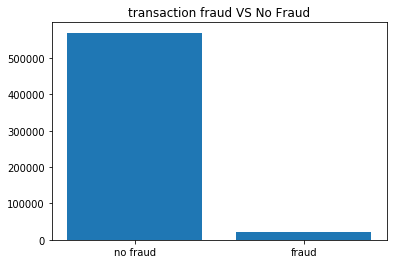

In [25]:
Image(filename='fraud.png',width=300, height=300)

On observe que la plupart des transactions sont non frauduleuses. Si on utilise cette base de données comme base pour nos modèles prédictifs et nos analyses, nous pourrions obtenir beaucoup d'erreurs et nos algorithmes seront probablement trop adaptés car ils "supposeront" que la plupart des transactions ne sont pas de la fraude. Mais on ne veut pas que notre modèle suppose, nous voulons que notre modèle détecte les modèles qui donnent des signes de fraude !

    - card 1 - card 6

Ces variables nous donnent des informations sur les cartes de paiement.

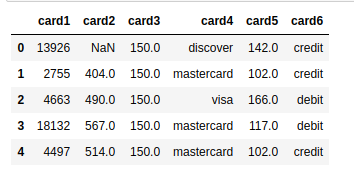

In [28]:
Image(filename='card_head.png',width=300, height=300)

Les variables card4 et card6 sont des chaînes de caractères et ce sont les seules variables compréhensibles.

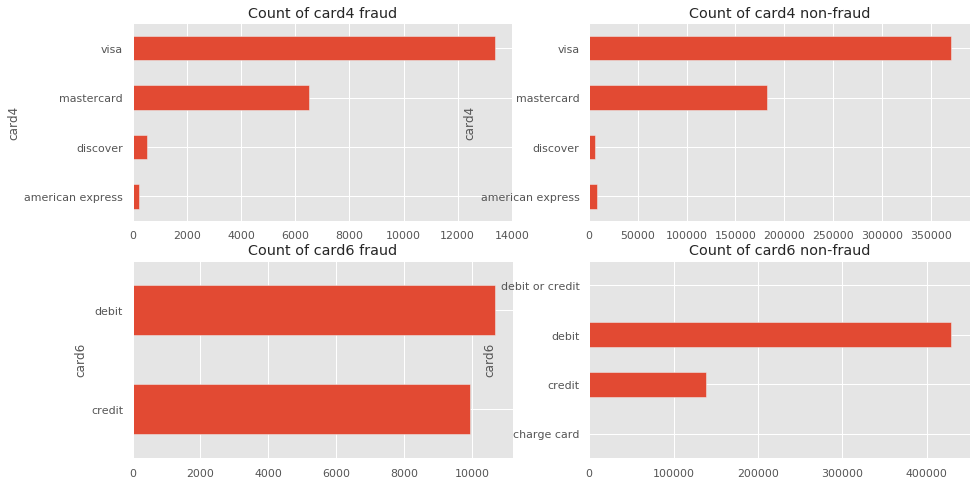

In [40]:
Image(filename='card.png',width=650, height=300)

On observe que dans le cas des fraudes et des non-fraudes, les cartes visa sont les plus utilisées. 

De plus, dans le cas des fraudes, le nombre de cartes de débit et de crédit sont à peu près les mêmes, contrairement au cas des non-fraudes où le nombre de cartes de débit est bien supérieur au nombre de cartes de crédit.

     - TransactionAMt : 

Cette variable décrit le montant de la transaction.

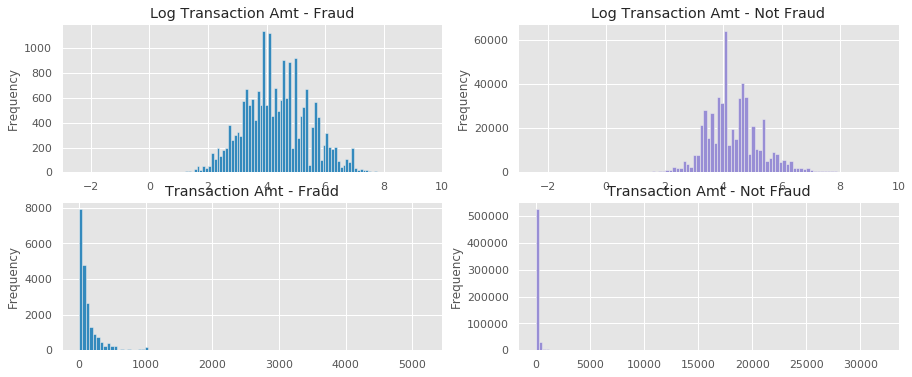

In [39]:
Image(filename='transaction.png',width=680, height=300)

On représente la distribution du log de la variable "Transaction Amt" pour les transactions frauduleuses et pour les transactions non frauduleuses. Ces distributions ont l'allure d'une loi normale et ont des variances comparables.
On observe que la moyenne $\mu_1$ du montant des transactions dans le groupe des fraudes est différente de la moyenne $\mu_2$ dans le cas des transactions non frauduleuses.

On fait alors un test de student, pour vérifier cette observation.

On teste, $H_0 : \mu_1 = \mu_2$ contre $H_1 : \mu_1 \neq \mu_2$

Ainsi, on trouve une $p-value = 3 \times 10^{-19}<0.05$.

Donc on rejette $H_0$, c'est-à-dire que les moyennes des deux distributions ne sont effectivement pas égales. 

        - TransactionDT :
        
On trace la variable "TransactionDT" pour l'échantillon train et test. 


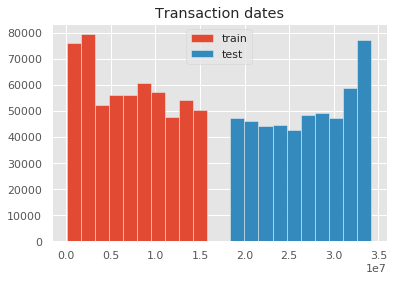

In [44]:
Image(filename='transDT.png',width=280, height=300)

On remarque que les dates de transactions de train et de test ne se chevauchent pas.

 - **Github** :

Nous apprenons également à utiliser github étant donné qu'aucun d'entre nous n'est familier avec cette platform.

 - **Premier modèle** :
 
Implémentation de l'algorithme Random Forest sur un nombre resteint de données: accuracy= 0,8.
On obtient une grande valeur d'accuracy, néanmoins, cette metric n'est pas appropriée lorsque les classes ne sont pas équilibrées.
En effet, comme on a remarqué précédemmment, la distribution de IsFraud n'est pas du tout équilibrée (il y a beaucoup plus de 0 que de 1), et donc même si le modèle prédit 0 tout le temps, cela donnera une grande accuracy.


## Pour la séance prochaine

Nous nous sommes répartis le travail comme ceci : 

- Réfléchir à une méthode pour gérer les variables contenant des chaînes de caractères (Auxence)
- Regarder les correlations entre les variables (Anthony)
- Faire des modèles simples sur un petit nombre de variables, par exemple Naive Bayes, LDA (Amina)
- Commencer à rédiger le rapport (Yamina)

# Séance 3

 - **Rédaction du début du rapport**
 
Lors de cette séance, nous entamons la rédaction du rapport (introduction, début d'exploration des données).

 - **Application de l'algorithme Naive Bayes**

On commence par appliquer le classifier Naive Bayes car son utilisation ne nécessite pas l'ajustement d'hyperparamètres.

La classification naïve bayésienne est un type de classification bayésienne probabiliste simple basée sur le théorème de Bayes avec une forte indépendance des hypothèses.
On peut alors prédire la valeur de la variable à expliquer, ici il s'agit de IsFraud, à l'aide de la formule suivante.


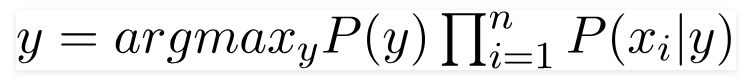

In [48]:
Image(filename='naive.png',width=280, height=300)

où $y$ : IsFraud qui vaut 0 ou 1

et $x_1,...,x_n$ sont les variables explicatives.

Avantages et inconvénients de Naive Bayes:

Avantages

 - C’est relativement simple à comprendre et à construire
 - Il est facile à former, même avec un petit jeu de données
 - C’est rapide!
 - Il n’est pas sensible aux caractéristiques non pertinentes

Désavantages

 - Il implique que chaque fonctionnalité soit indépendante, ce qui n’est pas toujours le cas.


 On applique cet algorithme en ne prenant en compte que les variables continues. On remplace les NA par la médiane car c'est une méthode généralement utilisée. 
 
On trouve alors : AUC = 0.58, ce qui n'est pas très bon.

Afin de pouvoir juger de l'efficacité d'un modèle, On utilise l'AUC qui correspond à l'aire sous la courbe ROC. 

Une courbe ROC (receiver operating characteristic) est un graphique représentant les performances d'un modèle de classification pour tous les seuils de classification. Cette courbe trace le taux de vrais positifs (VP) en fonction du taux de faux positifs (FP).

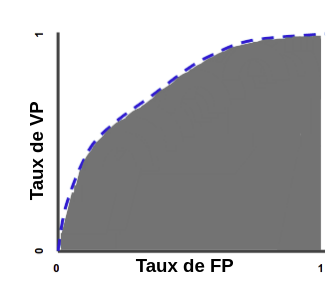

In [52]:
Image(filename='roc.png',width=170, height=300)

 - **Récupération des variables indépendantes de isFraud et application d'une régression logistique**
 
Elle décrit la modélisation d’une variable qualitative Y à 2 modalités : 1 ou 0. Dans notre cas Y correspond à IsFraud.

La régression logistique cherche à estimer la probabilité
$P(Y|X)$ : 
Y a deux modalités, donc :

$\frac{P(Y=1|X)}{P(Y=0|X)}$ = $\frac{P(Y=1)*P(X|Y=1)}{P(Y=0)*P(X|Y=0)}$

Dans un premier temps, nous utilisons la régression logistique avec les paramètres par défaut.

On trouve un AUC = 0.809

 - **Convertir les variables contenant des chaînes de caractère en numérique** :
 
Nous utilisons la méthode de label encoding qui consiste à remplacer par des chiffres les chaînes de caractères.
Par exemple, la variable card-6 prend pour valeur credit et debit, on les remplace alors par credit=1 et debit=2.
 
Nous nous sommes rendus compte que la méthode de label encoding n'est pas appropriée, car elle suggère qu'il y a un ordre entre les valeurs, en utilisant l'exemple précédent, on aurait debit=2>credit=1, ce qui n'a pas de sens.

Nous utilisons alors l'encodage one-hot. 

Cette méthode consiste à créer et ajouter des colonnes binaires qui réfèrent ou non la donnée par un 0 ou 1.

Par exemple, la variable 'card4' peut prendre les valeurs visa, american express, discover ou mastercard. Ainsi, avec l'encodage one-hot, quatres colonnes  card4\_visa,card4\_americanexpress, card4\_discover et card4\_mastercard sont créees où si la transaction à été faite par carte visa par exemple, la valeur de la variable card4\_visa est de 1 et celle des autres variables est de 0, comme représenté sur la photo ci-dessous:


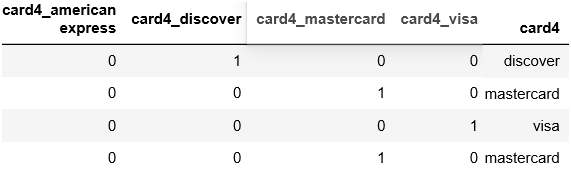

In [54]:
Image(filename='card4.png',width=380, height=300)

## Pour la séance prochaine

Nous nous sommes répartis le travail : 
 
- Finir l'exploration des données en utilisant des méthodes de régularisation (Lasso, Ridge)(Anthony)
- Mettre en commun tous les notebooks (Amina)
- Appliquer d'autres algorithmes de machine learning en prenant en compte toutes les variables (Amina)
- Continuer la rédaction du rapport (Yamina)


# Séance 4

Pendant cette séance, nous nous intéressons à appliquer des algorithmes de Machine Learning à nos données pré-traitées.

- **Tester cross validation pour le paramètre inverse of regularization strength pour la méthode de régression logistique**

La régression logistique consiste à faire l'hypothèse que cette quantité peut être écrite à l'aide d'une fonction linéaire en X et par la suite à maximiser la log-vraisemblance. Toutefois, afin d'éviter un overfitting ou un problème de convergence aux algorithmes qui approximent les coefficients de régression, on peut pénaliser les grands coefficients. Cela peut se faire en ajoutant un terme de pénalisation à la fonction de log-vraisemblance. 

La fonction que nous avons utilisé nous a permis d'utiliser 3 types de pénalisation. La régularisation L1, la régularisarion L2 et elasticnet qui est une combinaison des deux premières. De plus, la régularisation L1 est aussi utile pour de la selection de variable.

Si on considère un dataset de n lignes et p colonnes.

La régularisation L1 (Lasso) : 

La regularisation L1 pénalise les coefficients $|\beta_j|$

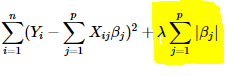

In [56]:
Image(filename='lasso.png',width=200, height=300)

La régularisation L2 (Ridge) : 

La regularisation L2 pénalise les coefficients $\beta_j^2$

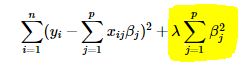

In [58]:
Image(filename='ridge.png',width=200, height=300)

 - **Lasso pour sélection de variables** : 
 
Pour $\lambda$=1 et pour $\lambda$=0.1 nous observons que toutes les variables ont un coefficient nul.

Et pour $\lambda$=0.01, seulement 20 variables ont un coefficient non nul, ce qui est trop peu.

Nous décidons alors de ne pas utiliser cette méthode pour faire une sélection de variables. 



- **Commencer à regarder l'algorithme Adaptive Boosting**

La méthode de boosting adaptative consiste à appeler de manière repétitive (M fois) un classifier faible. Considérons les données d'apprentissages suivantes: $(X_i,y_i), i = 1, ...,n $ et $y_i = 0 \quad \text{ou} \quad y_i = 1$ (classification binaire). On associe à chaque $X_i$ un poids $D_i$.

Adaboost combine plusieurs apprenants faibles en un seul apprenant fort. 

Les apprenants faibles dans AdaBoost sont des arbres de décision avec une seule division, appelés souches de décision. 

Lorsque AdaBoost crée son premier noeud de décision, toutes les observations sont pondérées de manière égale. Pour corriger l'erreur précédente, les observations incorrectement classées ont désormais plus de poids que les observations correctement classées. 


- **Voir la méthode K-NN**

On utilise la méthode des k plus proches voisins (K-NN).
Pour effectuer une prédiction, l’algorithme K-NN va se baser sur le jeu de données en entier. En effet, pour une observation, qui ne fait pas parti du jeu de données, qu’on souhaite prédire, l’algorithme va chercher les K instances du jeu de données les plus proches de notre observation. Ensuite pour ces K voisins, l’algorithme se basera sur leurs variables de sortie IsFraud pour calculer la valeur de la variable IsFraud de l’observation qu’on souhaite prédire. 

Dans le cadre de la classification, c’est le mode des variables IsFraud des K plus proches observations qui servira pour la prédiction.

Le paramètre important de cette méthode est le nombre de voisins considérés (n_neighbors).
on utilise gridsearch pour tester toutes les valeurs de n_neighbors.


- **Application du modèle random forest**

Random Forest est un modèle composé de nombreux arbres de décision. Plutôt que de simplement faire la moyenne de la prédiction des arbres (que nous pourrions appeler une «forêt»), ce modèle utilise deux concepts clés qui lui donnent le nom aléatoire:

- Échantillonnage aléatoire des points de données d'entraînement lors de la construction d'arbres

- Sous-ensembles aléatoires de variables pris en compte lors de la division des nœuds

**Avantages:**

- L'algorithme _Random Forest_ est considéré comme une méthode très précise et robuste en raison du nombre d'arbres de décision participant au processus.

- Rapide dans les calculs

- Classe les variables explicatives en fonction de leur lien avec les variables à expliquer 

- Il ne souffre pas du problème de sur-ajustement. La raison principale est qu'il prend la moyenne de toutes les prédictions, ce qui annule les biais.

- On peut obtenir l'importance relative des variables, ce qui aide à sélectionner les variables les plus contributives pour le classificateur.

**Paramètres:**

- _n_estimators:_ Nombre d'arbres dans la forêt. La valeur par défaut est 10.

- _min_samples_split:_ nombre minimum de  nœud requis pour la division. La valeur par défaut est 2.

- _max_features:_  nombre de variables à considérer lors de la recherche de la meilleure répartition. si 'sqrt' alors max_features = sqrt (n_features)

- _n_jobs_= -1 signifie utiliser tous les processeurs


## Pour la séance prochaine

Nous nous sommes répartis le travail comme ceci :
- Continuer à travailler sur le modèle random forest (Yamina)
- Contrinuer à travailler sur la cross validation pour le paramètre inverse of regularization strength pour la méthode de régression logistique (Anthony)
- Continuer à travailler sur la méthode KNN (Amina)
- Continuer à travailler sur la méthode Adaboost(Auxence)

# Séance 5

**Random forest :**

- Entrainement des données avec les paramètres suivants: n_jobs=-1, n_estimators = 40,max_features = 'sqrt' puis prédiction sur les données tests,
- Recherche du nombre moyen des noeuds et la profondeur maximale moyenne pour chaque arbre,
- courbe ROC et résultat AUC sur l'ensemble de variables,
- Réglage d'hyperparamètres: on a essayé deux méthodes (1) On a effectuer une recherche aléatoire de meilleurs hyperparamètres. Cela sélectionnera de manière aléatoire des combinaisons d'hyperparamètres à partir d'une grille, les évaluera à l'aide d'une validation croisée sur les données d'entraînement et renverra les valeurs les plus performantes. (2)On s'est concentré sur 3 hyperparamètres.
- Selection des variables importantes
- Reprendre le modèle avec les variables les plus importantes et les hyperparamètres optimaux.
- L'option (2) Retourne un meilleur résultat AUC qui est passé de 0.92 à 0.94

**Régression logistique :**

la L2 régularisation est celle qui a permis d'avoir le meilleur auc. 
Cela peut s'expliquer que par le néttoyage de données nous avions déjà suffisament réduit notre nombre de variable. Nous avons optimisé les paramètres en prenant en compte notre base de donnée qui a un problème de classe déséquilibrée. À l'issue de cela, nous avons obtenu un score auc allant jusqu'à 0.827


**Knn :**

Pour trouve la valeur optimale de K, on utilise la méthode GridSearchCV qui prend en paramètre l'estimateur knn et une liste contenant une grille de  valeurs de K, et retourne la meilleure valeur de K; celle qui maximise le score obtenu en faisant une 5-fold cross validation.

Dans notre cas, nous avons trouvé une valeur de K optimale égale à 2.

En utilisant cette valeur de K, nous avons prédit sur le test et obtenu un AUC de 0.63. 

**Adaboost :**

Nous avons choisi d'utiliser cet algorithme car il permet d'éviter le sur-apprentissage. 

Comme classifieur faible, nous utilisons l'arbre de décision. Nous utilisons nestimator = 50.

Rappelons que ce paramètre désigne le nombre de fois où on entraine de manière repétitive l'arbre de décision. Nous fixons learningrate = 1. C'est un paramètre qui exprime la contribution de chaque modèle entrainé itérativement aux poids $D_i$.

On trouve un AUC de 0.71.